In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
inflation = pd.read_csv('Price_index.csv',index_col = 0)

inflation.columns = ['price']
inflation['delta'] = ((inflation['price'] - inflation['price'].shift(12))/inflation['price']) * 100
inflation = inflation.loc['1976-01-01':'2017-03-01']
inflation.astype(dtype = 'float')

funds = pd.read_csv('Retail_money_funds.csv', index_col = 0)
funds = funds.loc['1975-01-01':'2017-03-01']
funds.columns = ['Funds']
funds['Funds'] = funds['Funds']
funds.astype(dtype = 'float')

m2 = pd.read_csv('M2_USA.csv',index_col = 0)
m2 = m2.loc['1975-01-01':'2017-03-01']
m2.columns = ['M2']
m2['M2'] = m2['M2']/1000000000
m2.astype(dtype = 'float')

difference = m2['M2'] - funds['Funds']
difference.astype(dtype = 'float')

delta_difference = ((difference - difference.shift(12))/difference) * 100

delta_difference = pd.DataFrame(delta_difference)
delta_difference = delta_difference.loc['1976-01-01':'2017-03-01']
delta_difference.astype(dtype = 'float')

delta_difference.columns=['M2_less_funds']
print(delta_difference)

            M2_less_funds
DATE                     
1976-01-01      11.704412
1976-02-01      12.166458
1976-03-01      11.958389
1976-04-01      11.921406
1976-05-01      11.663551
...                   ...
2016-11-01       6.644492
2016-12-01       6.649184
2017-01-01       6.942761
2017-02-01       6.936623
2017-03-01       6.687508

[495 rows x 1 columns]


<Figure size 432x288 with 0 Axes>

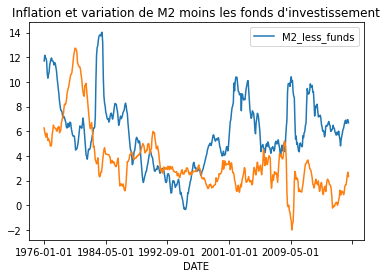

In [3]:
plt.figure()
delta_difference.plot()
inflation['delta'].plot()
plt.title("Inflation et variation de M2 moins les fonds d'investissement")
plt.show()

In [4]:
############# Analyse statistique de base #############

## inlfation et delta différence entre 1976 et 2017 ##

x1 = inflation['delta'].values
y1 = delta_difference['M2_less_funds'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x1,y1)
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = (-0.019754080356478746, 0.6610730199335222)


<Figure size 432x288 with 0 Axes>

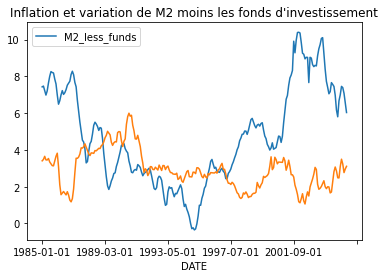

In [5]:
## inlfation et delta différence entre 1985 et 2005 ##

delta_difference_1985 = delta_difference.loc['1985-01-01':'2005-03-01']
inflation_1985 = inflation.loc['1985-01-01':'2005-03-01']

plt.figure()
delta_difference_1985.plot()
inflation_1985['delta'].plot()
plt.title("Inflation et variation de M2 moins les fonds d'investissement")
plt.show()

In [6]:
############# Analyse statistique de base #############

x2 = inflation_1985['delta'].values
y2 = delta_difference_1985['M2_less_funds'].values

from scipy.stats import pearsonr
coeff_pearson = pearsonr(x2,y2)
print("coefficient de Pearson après 1985 = {}".format(coeff_pearson))

coefficient de Pearson après 1985 = (-0.34456345444970055, 3.522215430365907e-08)
